# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
# URL of the dataset
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

# Load the dataset
data = pd.read_csv(url)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DataPreprocessing
- `Shape of Data`
- `Columns`
- `Null values`
- `Duplicates`
- `Unique Values`
- `Statistical Summary`

# Shape Of data

In [3]:
data.shape

(7043, 21)

# Columms

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.drop(columns=['customerID'],inplace=True)

- **Gender:** Show that customer is male or female
- **SeniorCitizen:**  Indicates if the customer is a senior citizen (1 for Yes, 0 for No).
- **Partner:** Indicates if the customer has a partner (Yes or No).
- **Dependents:** Indicates if the customer has dependents (Yes or No).
- **tenure:** The number of months the customer has stayed with the company.
- **PhoneService:** Indicates if the customer has phone service (Yes or No).
- **MultipleLines:** Indicates if the customer has multiple lines (No phone service, Yes, No).
- **InternetService:** The type of internet service the customer has.
- **OnlineSecurity:** Indicates if the customer has online security add-on (Yes, No, No internet service).
- **OnlineBackup:** Indicates if the customer has online backup add-on (Yes, No, No internet service).
- **DeviceProtection:** Indicates if the customer has device protection add-on (Yes, No, No internet service).
- **TechSupport:** Indicates if the customer has tech support add-on (Yes, No, No internet service).
- **StreamingTV:** Indicates if the customer has streaming TV service (Yes, No, No internet service).
- **StreamingMovies:** Indicates if the customer has streaming movies service (Yes, No, No internet service).
- **Contract:** The type of contract the customer has (Month-to-month, One year, Two year).
- **PaperlessBilling:** Indicates if the customer has paperless billing (Yes or No).
- **PaymentMethod:** The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- **MonthlyCharges:** The amount charged to the customer monthly.
- **TotalCharges:** The total amount charged to the customer.
- **Churn:** Indicates if the customer should leave or not (Yes or No).

# Dtypes

In [6]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Conclussion
- `Total Charges` in object form convert this into float
- `Total Charges` contain empty string convert this into `np.nan`

In [7]:
data['TotalCharges']=data['TotalCharges'].replace(" ", np.nan)

In [8]:
data['TotalCharges']=data['TotalCharges'].astype("float64")

In [9]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Null Values

In [10]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Conclussion
- `Total Charges` contain `11 null` values so we can drop these value b/c there are very less nbr of null values

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Duplicates

In [13]:
data.duplicated().sum()

22

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

0

# Unique Values

In [16]:
for i in data.select_dtypes("object").columns:
    print("Unique value in: ",i)
    print(data[i].unique())
    print("Total Unique Values are: ",data[i].nunique())
    print("*"*50)
    print()

Unique value in:  gender
['Female' 'Male']
Total Unique Values are:  2
**************************************************

Unique value in:  Partner
['Yes' 'No']
Total Unique Values are:  2
**************************************************

Unique value in:  Dependents
['No' 'Yes']
Total Unique Values are:  2
**************************************************

Unique value in:  PhoneService
['No' 'Yes']
Total Unique Values are:  2
**************************************************

Unique value in:  MultipleLines
['No phone service' 'No' 'Yes']
Total Unique Values are:  3
**************************************************

Unique value in:  InternetService
['DSL' 'Fiber optic' 'No']
Total Unique Values are:  3
**************************************************

Unique value in:  OnlineSecurity
['No' 'Yes' 'No internet service']
Total Unique Values are:  3
**************************************************

Unique value in:  OnlineBackup
['Yes' 'No' 'No internet service']
Total Unique 

# Statistical Summary

In [17]:
data.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3535,3617,4911,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,5153


In [18]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


# Info

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

# Exploratory Data Analysis
### Num-Col

- **Num_Col**=["MonthlyCharges",'TotalCharges']
- **Cat_Col**= [All the columns Except `Num_col`]

In [20]:
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [21]:
def fun_plot(num_col,plot_name):
    
    if(plot_name=="hist"):
        fig,ax=plt.subplots(figsize=(15,7))
        plt.title(f"histogram of {num_col}")
        sns.histplot(data[num_col])
        plt.show()
    elif(plot_name=="kde"):
        fig,ax=plt.subplots(figsize=(15,7))
        plt.title(f"Density of {num_col}")
        sns.kdeplot(data[num_col])
        plt.show()
        
    elif(plot_name=="box"):
        fig,ax=plt.subplots(figsize=(8,7))
        plt.title(f"Boxplot of {num_col}")
        sns.boxplot(data[num_col])
        plt.show()

### Monthly_Charges

In [22]:
data['MonthlyCharges'].describe()

count    7010.000000
mean       64.888666
std        30.064769
min        18.250000
25%        35.750000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

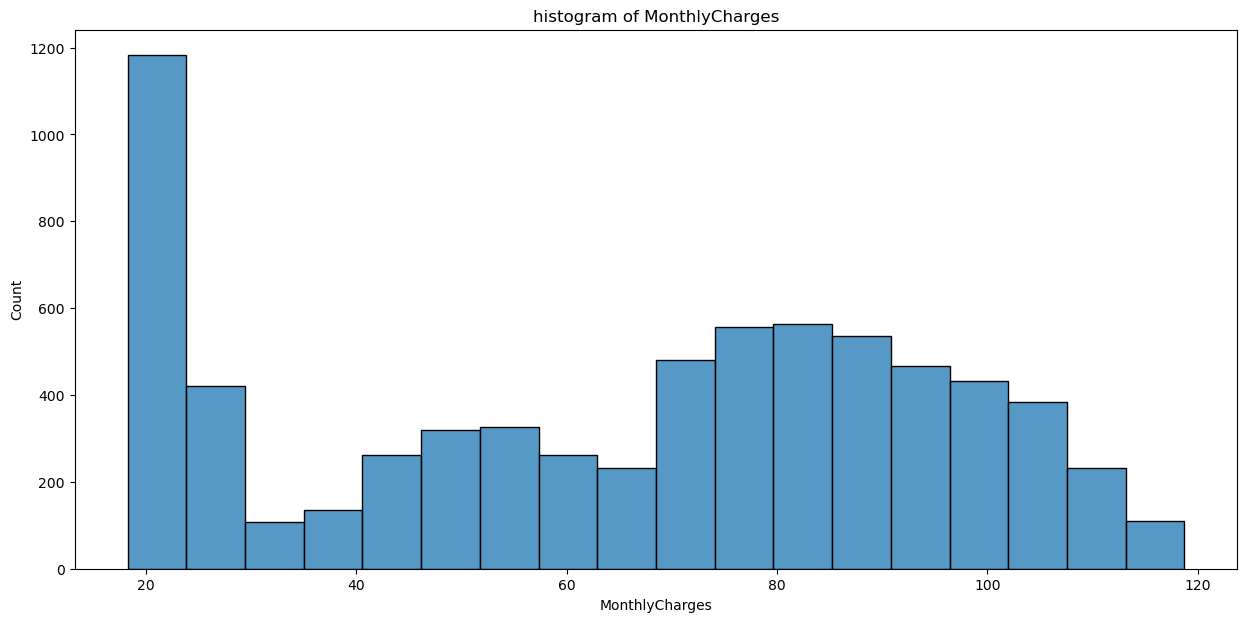

In [23]:
fun_plot("MonthlyCharges","hist")

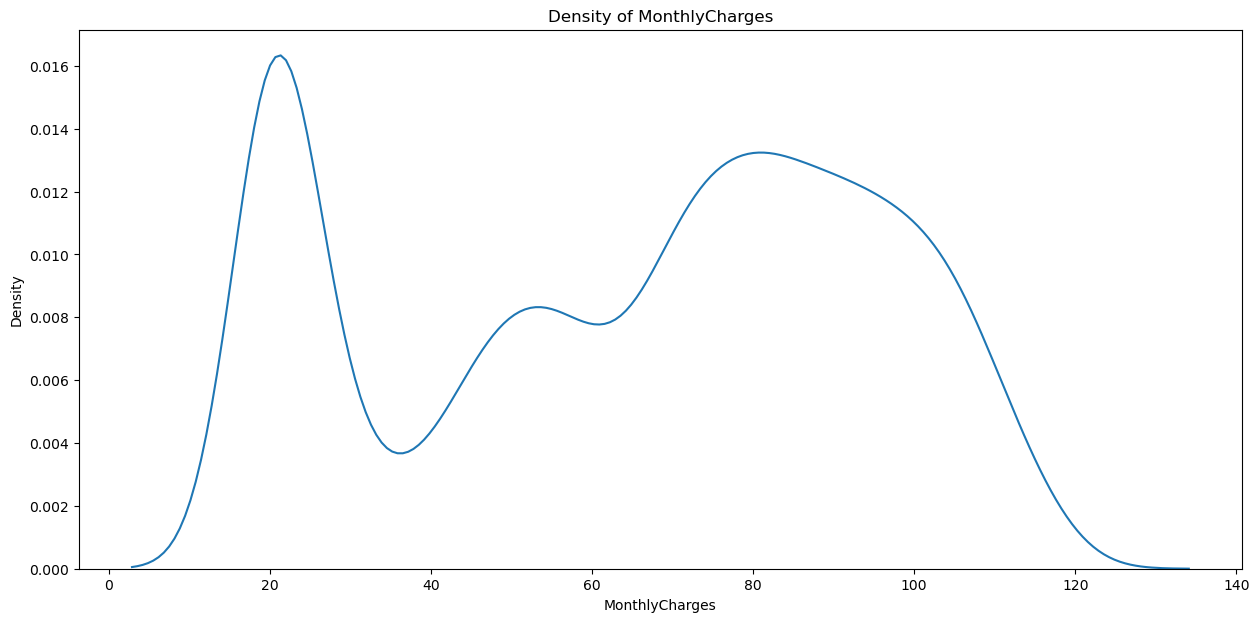

In [24]:
fun_plot("MonthlyCharges","kde")

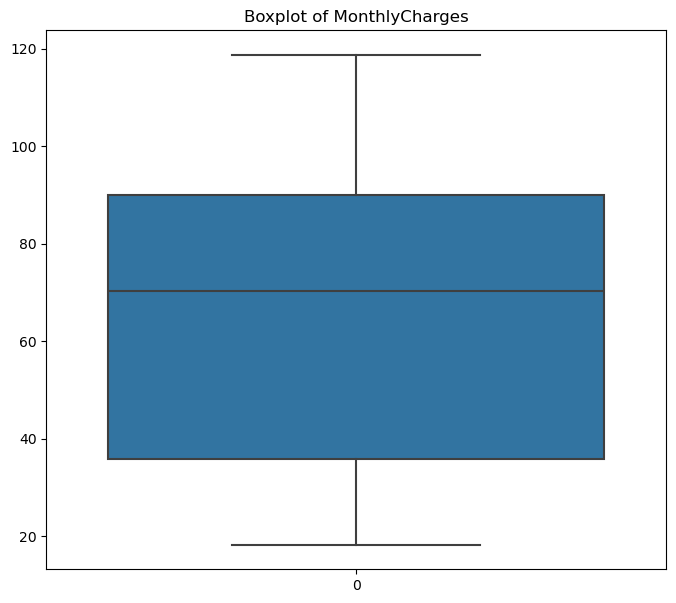

In [25]:
fun_plot("MonthlyCharges","box")

In [26]:
data['MonthlyCharges'].skew()

-0.2256859216372038

# TotalCharges

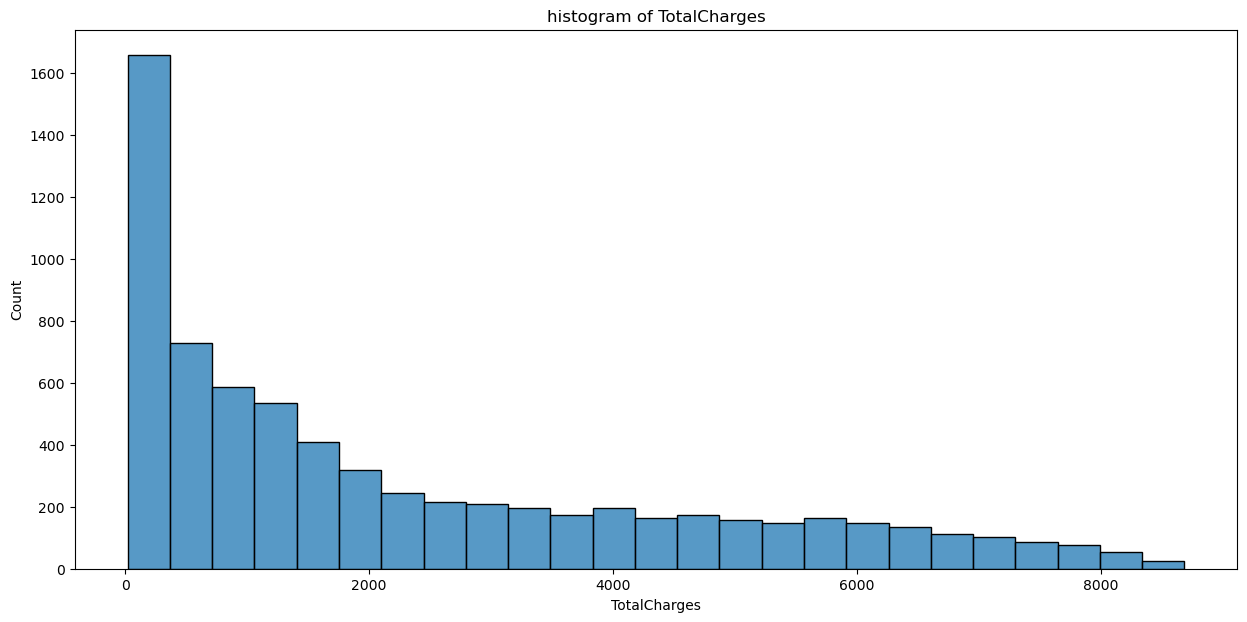

In [27]:
fun_plot("TotalCharges","hist")

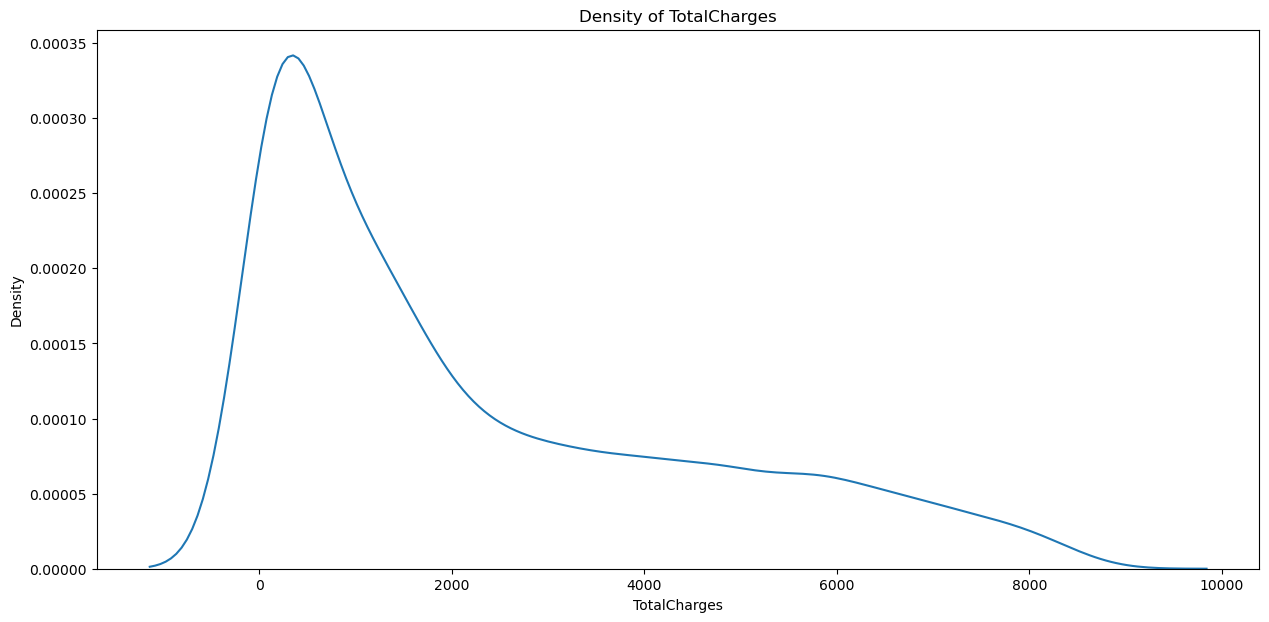

In [28]:
fun_plot("TotalCharges","kde")

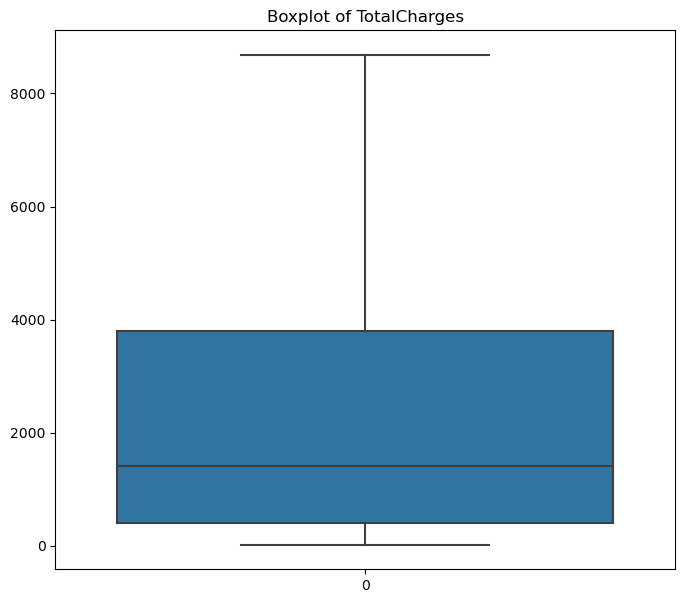

In [29]:
fun_plot("TotalCharges","box")

In [30]:
data['TotalCharges'].skew()

0.9583220586626408

# Conclussion
- We see that data should be right skewed

# tenure

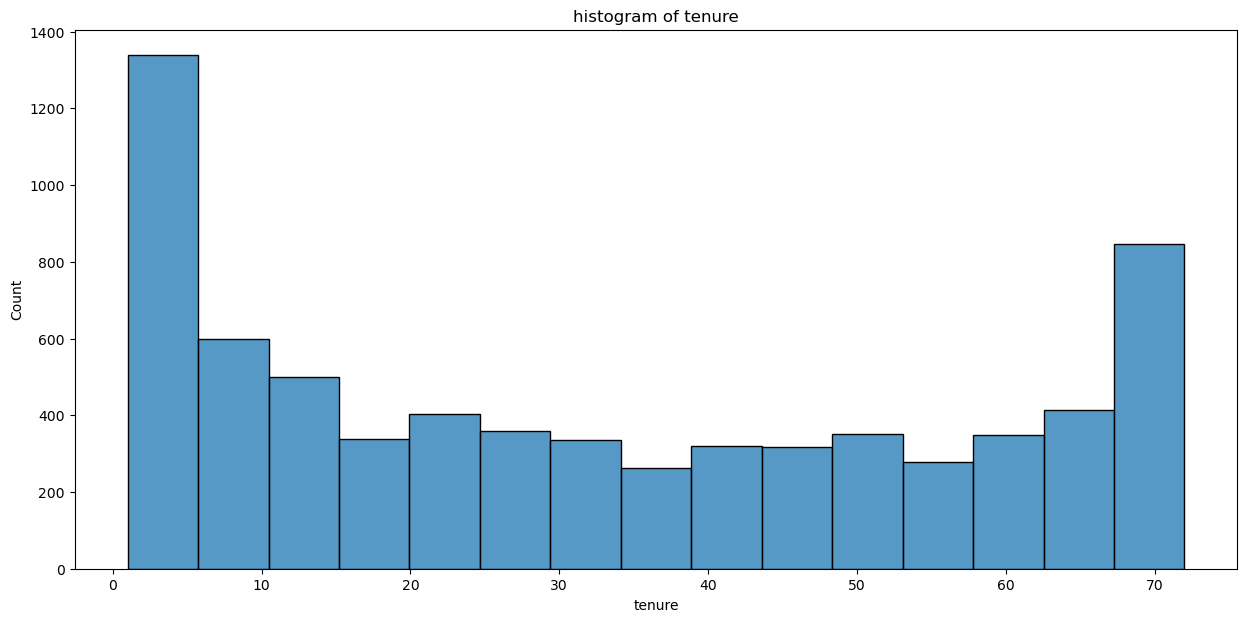

In [31]:
fun_plot("tenure","hist")

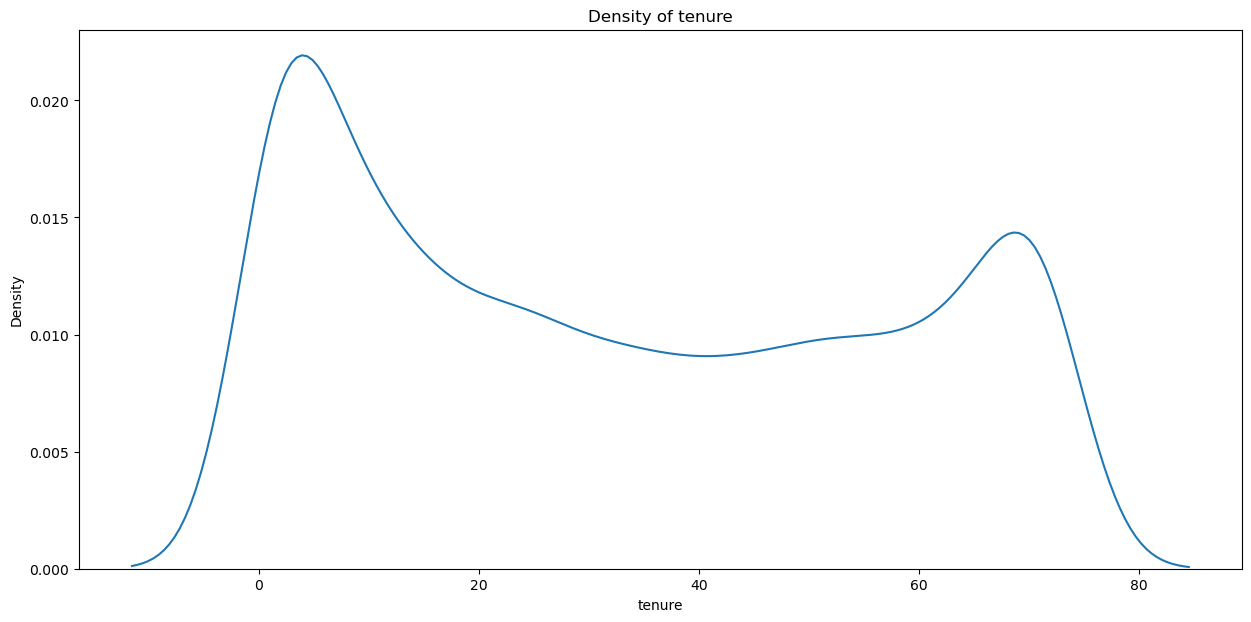

In [32]:
fun_plot("tenure","kde")

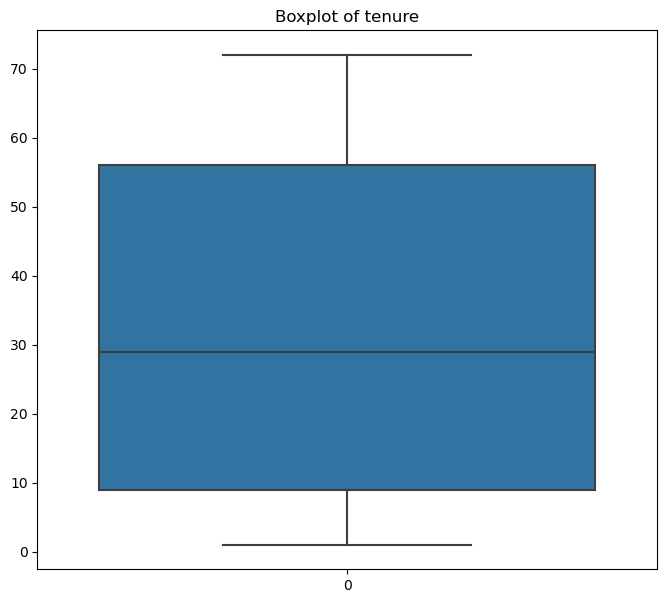

In [33]:
fun_plot("tenure","box")

In [34]:
data['tenure'].skew()

0.23374046380741495

# Catagorical Distrubution

In [35]:
def cat_plot(cat_col):
    temp=data[cat_col].value_counts()
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
    ax1.set_title(f"frequency distrubution of {cat_col}")
    sns.barplot(x=temp.index,y=temp.values,ax=ax1)
    
    ax2.set_title(f"pie chart of {cat_col}")
    plt.pie(temp.values,labels=temp.index,autopct="%.2f")
    ax2.legend(temp.index, loc="best", fontsize="medium")  # Add legend for pie chart
    ax2.axis("equal") 
    plt.show()

# Churn

In [36]:
data['Churn'].value_counts()

Churn
No     5153
Yes    1857
Name: count, dtype: int64

In [37]:
data['Churn'].value_counts(normalize=True)*100

Churn
No     73.509272
Yes    26.490728
Name: proportion, dtype: float64

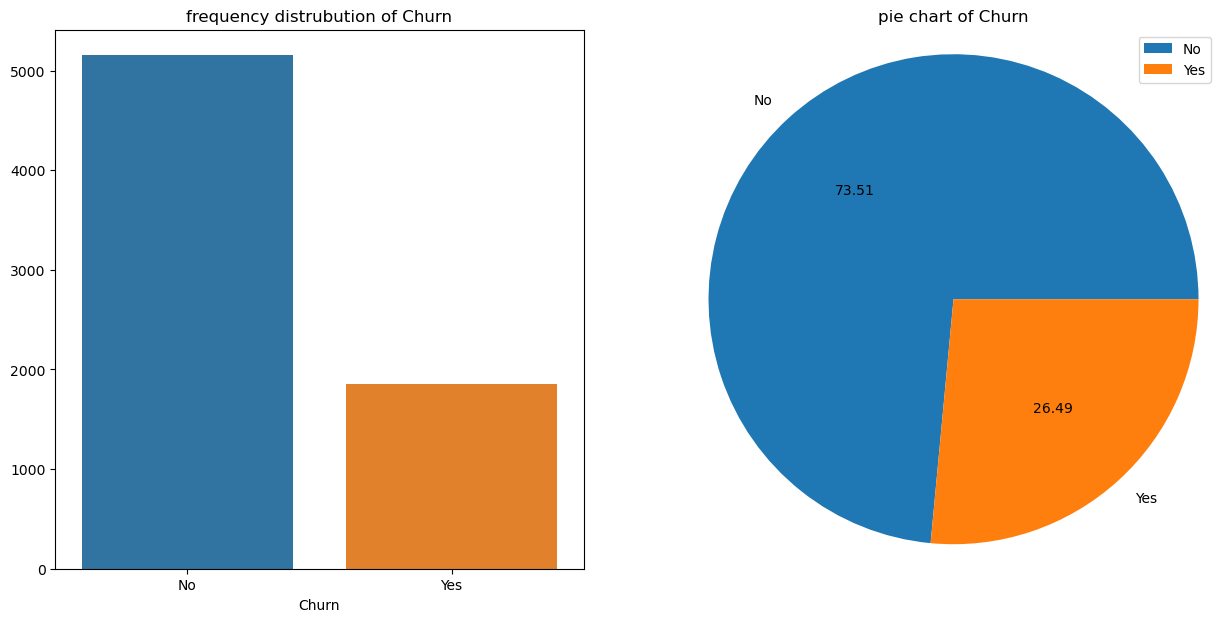

In [38]:
cat_plot("Churn")

# Conclussion
- We see that `26%` customer can leave them and `73%` of the people can't leave them

# Gender

In [39]:
data['gender'].value_counts()

gender
Male      3535
Female    3475
Name: count, dtype: int64

In [40]:
data['gender'].value_counts(normalize=True)*100

gender
Male      50.42796
Female    49.57204
Name: proportion, dtype: float64

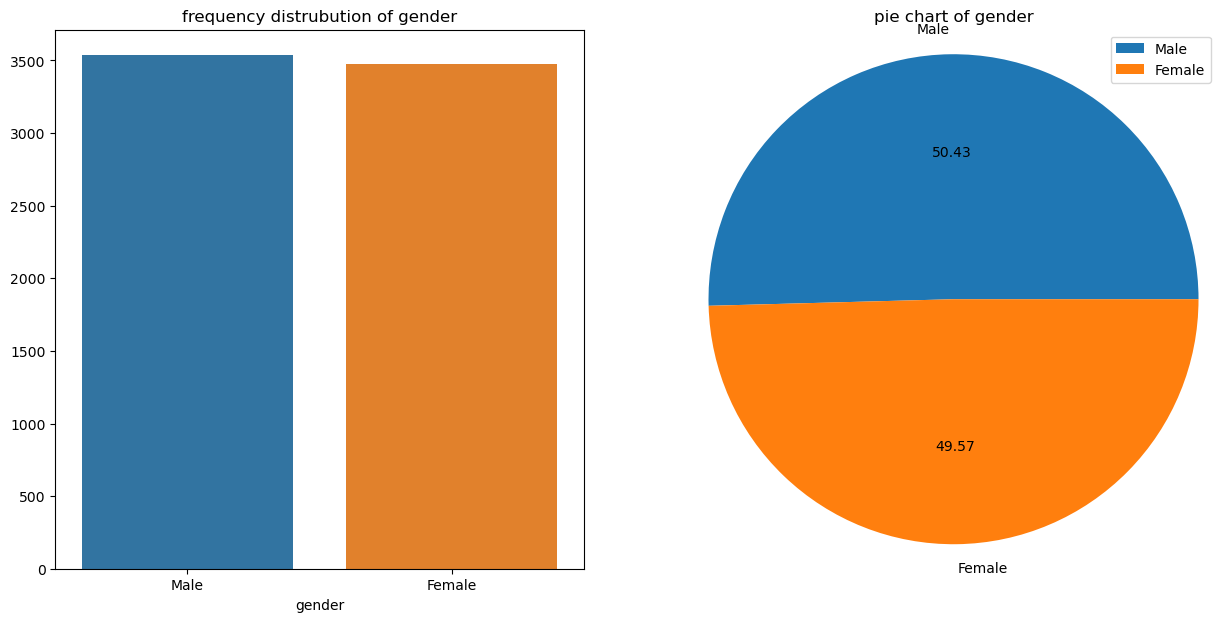

In [41]:
cat_plot("gender")

# Conclussion 
- We see that gender distrubution should be balance.

# SenierCitezen

In [42]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5869
1    1141
Name: count, dtype: int64

In [43]:
data['SeniorCitizen'].value_counts(normalize=True)*100

SeniorCitizen
0    83.723252
1    16.276748
Name: proportion, dtype: float64

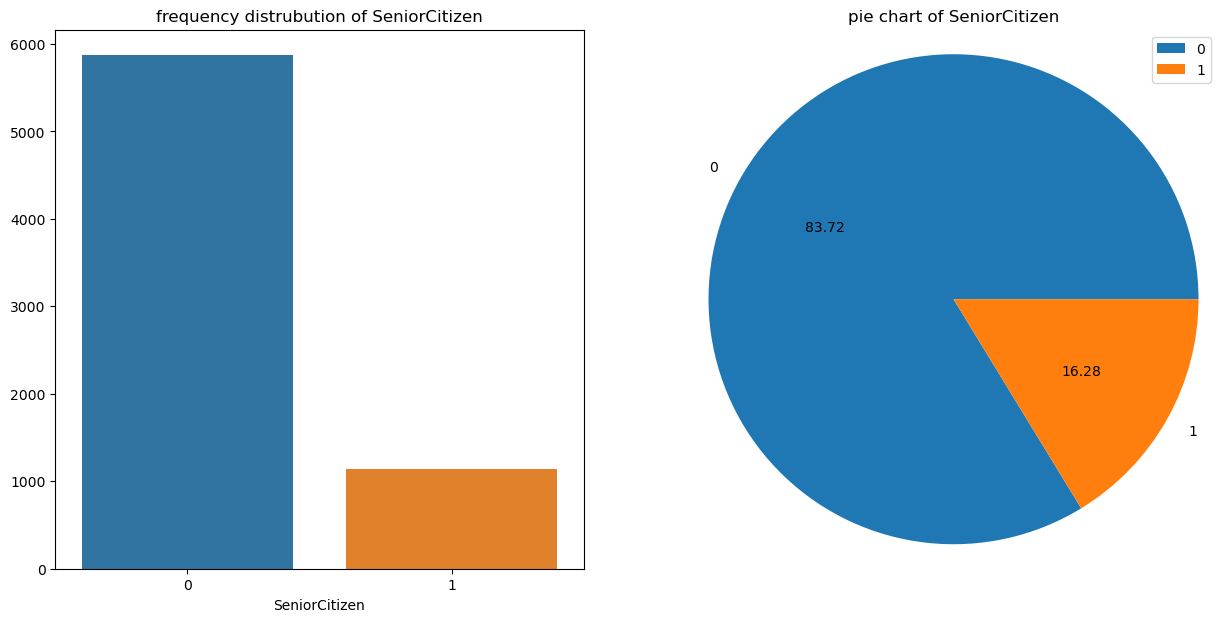

In [44]:
cat_plot("SeniorCitizen")

# Conclussion
- we See that only `16%` people are the senior citezen and remaining `83%` are the non senier citizen.

# Dependents

In [45]:
data['Dependents'].value_counts()

Dependents
No     4911
Yes    2099
Name: count, dtype: int64

In [46]:
data['Dependents'].value_counts(normalize=True)*100

Dependents
No     70.057061
Yes    29.942939
Name: proportion, dtype: float64

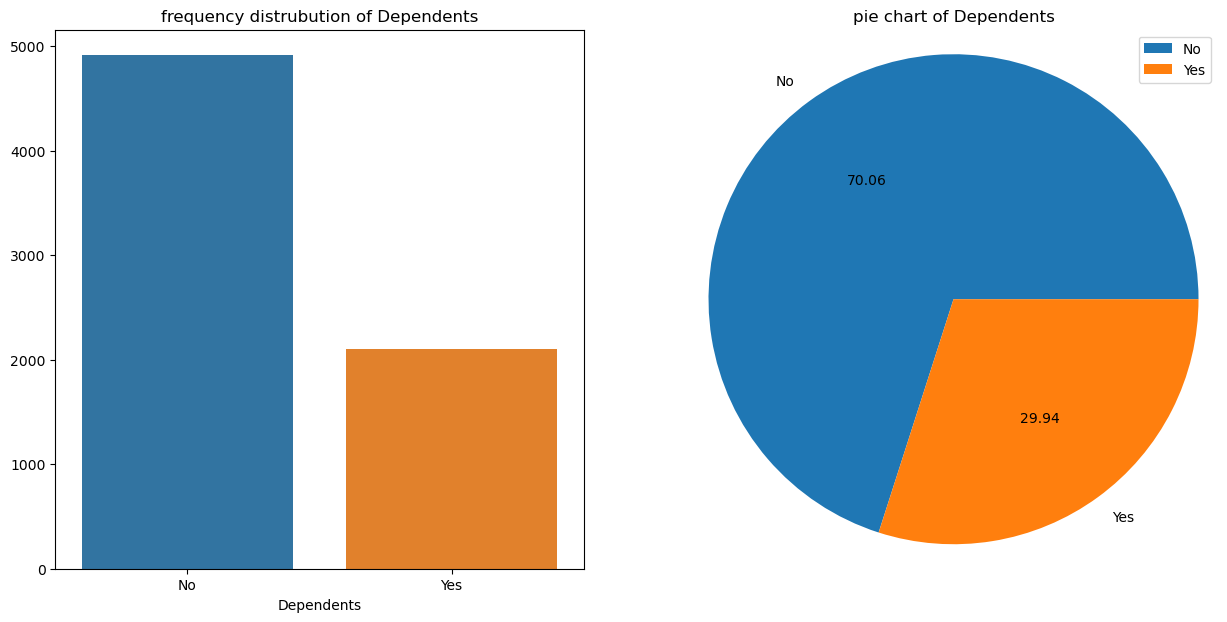

In [47]:
cat_plot('Dependents')

# Partner

In [48]:
data['Partner'].value_counts()

Partner
No     3617
Yes    3393
Name: count, dtype: int64

In [49]:
data['Partner'].value_counts(normalize=True)

Partner
No     0.515977
Yes    0.484023
Name: proportion, dtype: float64

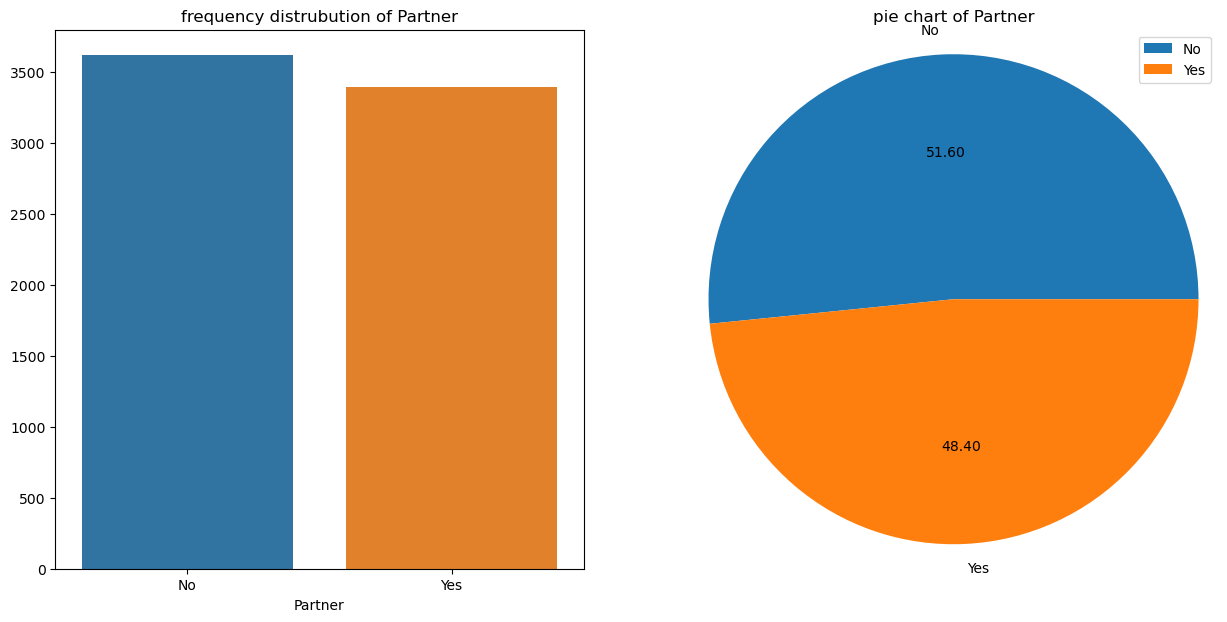

In [50]:
cat_plot("Partner")

# PhoneService

In [51]:
data['PhoneService'].value_counts()

PhoneService
Yes    6330
No      680
Name: count, dtype: int64

In [52]:
data['PhoneService'].value_counts(normalize=True)*100

PhoneService
Yes    90.299572
No      9.700428
Name: proportion, dtype: float64

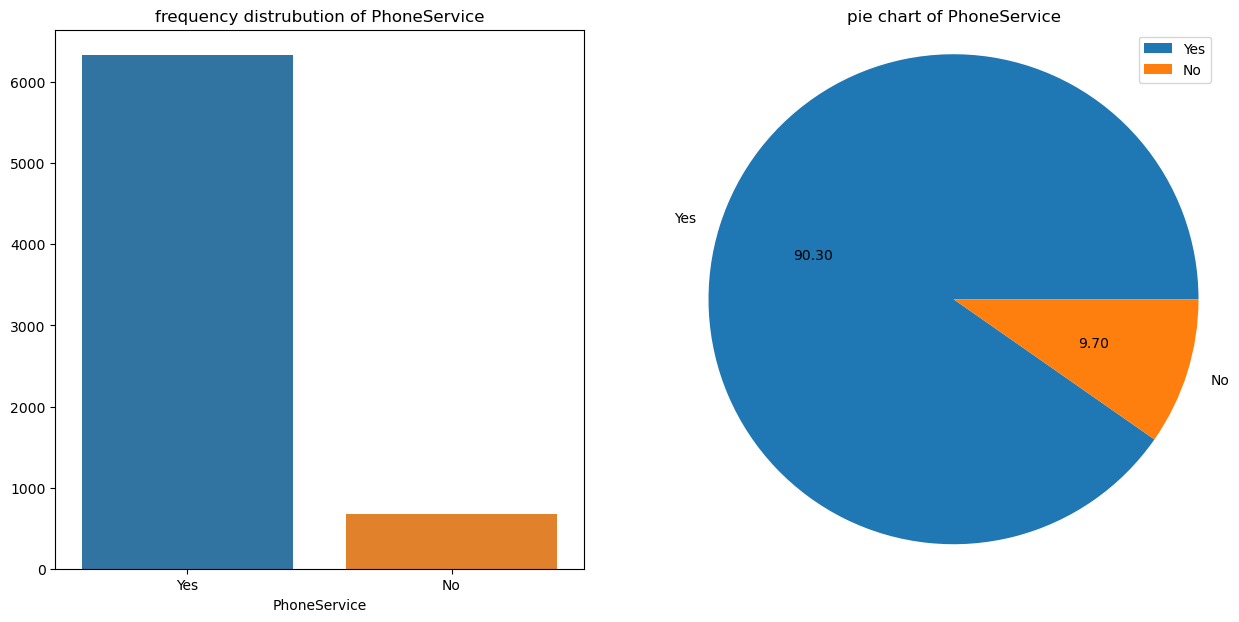

In [53]:
cat_plot("PhoneService")

# Conclussion
- we can see that most of the `Customer` can have a phone service and very less nbr of people donot have phone services.

# MultipleLines

In [54]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3363
Yes                 2967
No phone service     680
Name: count, dtype: int64

In [55]:
data['MultipleLines'].value_counts(normalize=True)*100

MultipleLines
No                  47.974322
Yes                 42.325250
No phone service     9.700428
Name: proportion, dtype: float64

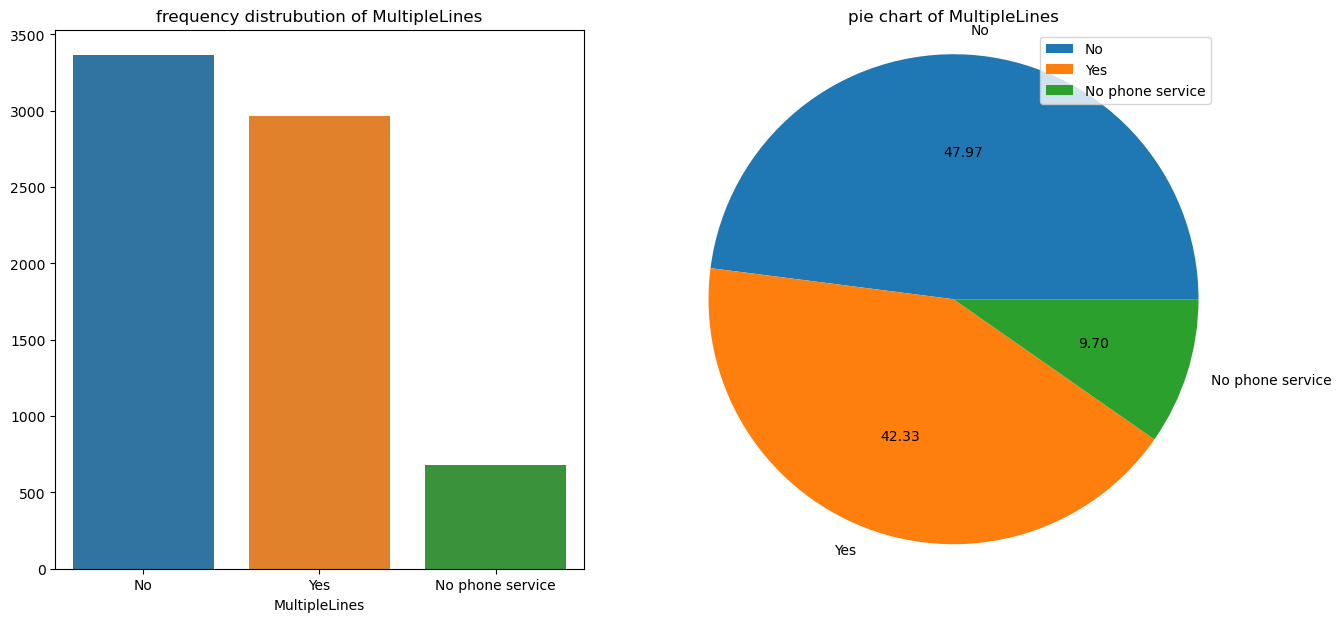

In [56]:
cat_plot('MultipleLines')

# Conclussion
- I can replace `No Phone Service` with `No` b/c if they have `No Phone Service` abousouly it donot have `multiple lines`

# Replace `No Phone Service` With `No` For All The Data 

In [57]:
data=data.replace(to_replace="No phone service" ,value="No",regex=True)
data=data.replace(to_replace="No internet service" ,value="No",regex=True)

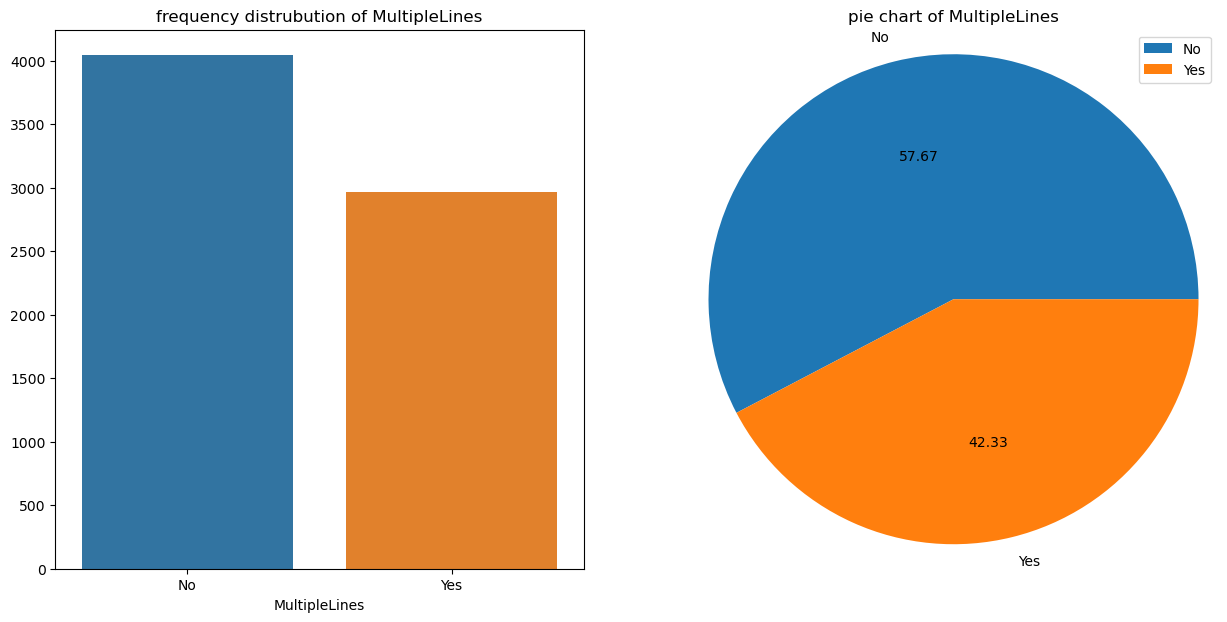

In [58]:
cat_plot('MultipleLines')

# InternetService

In [59]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64

In [60]:
data['InternetService'].value_counts(normalize=True)*100

InternetService
Fiber optic    44.079886
DSL            34.436519
No             21.483595
Name: proportion, dtype: float64

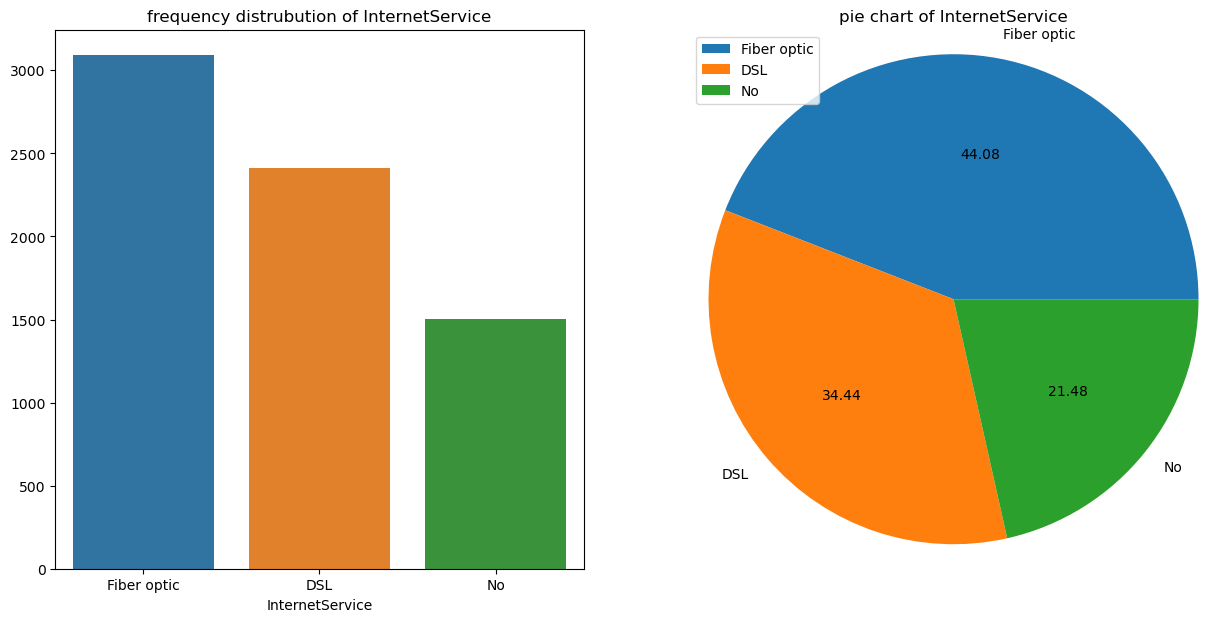

In [61]:
cat_plot('InternetService')

# Conclussion
- We see that `44%` of the customer can use `Fiber Optic` and `34%` of the customer can use `DSL` and `20%` customer can't use internet services.

# OnlineSecurity

In [62]:
data['OnlineSecurity'].value_counts()

OnlineSecurity
No     4995
Yes    2015
Name: count, dtype: int64

In [63]:
data['OnlineSecurity'].value_counts(normalize=True)*100

OnlineSecurity
No     71.25535
Yes    28.74465
Name: proportion, dtype: float64

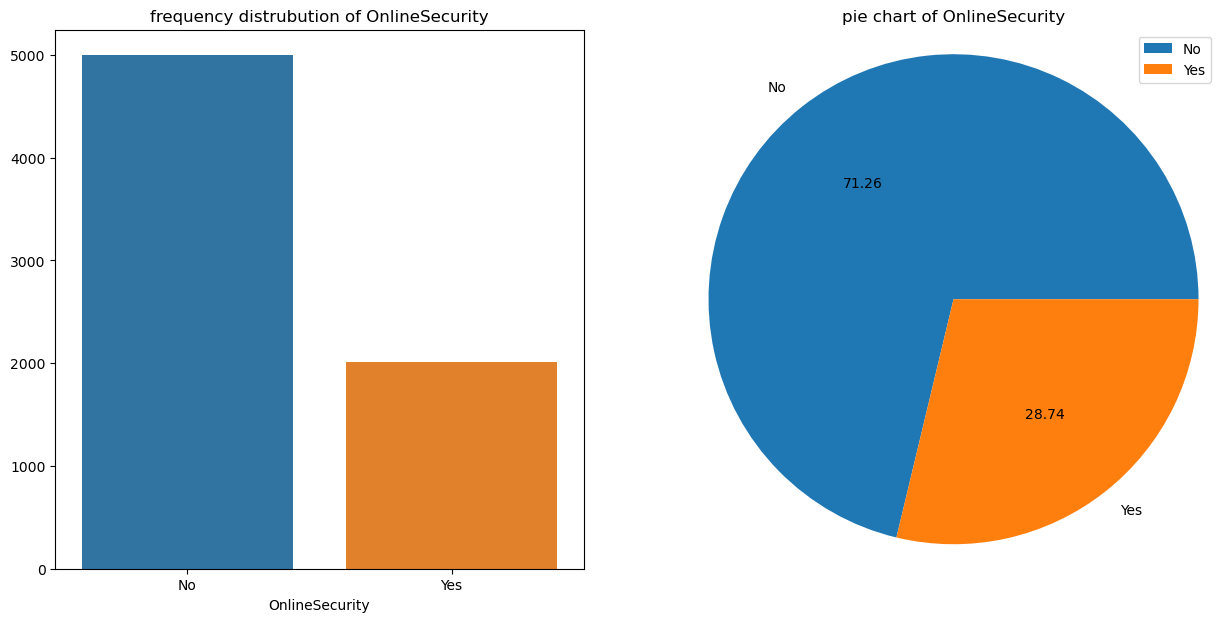

In [64]:
cat_plot('OnlineSecurity')

# Conclussion
- We can see that most of the customer can't have `OnlineSecuiery` and less nbr of people have online secuierty.

# Online Backup

In [65]:
data['OnlineBackup'].value_counts()

OnlineBackup
No     4585
Yes    2425
Name: count, dtype: int64

In [66]:
data['OnlineBackup'].value_counts(normalize=True)*100

OnlineBackup
No     65.406562
Yes    34.593438
Name: proportion, dtype: float64

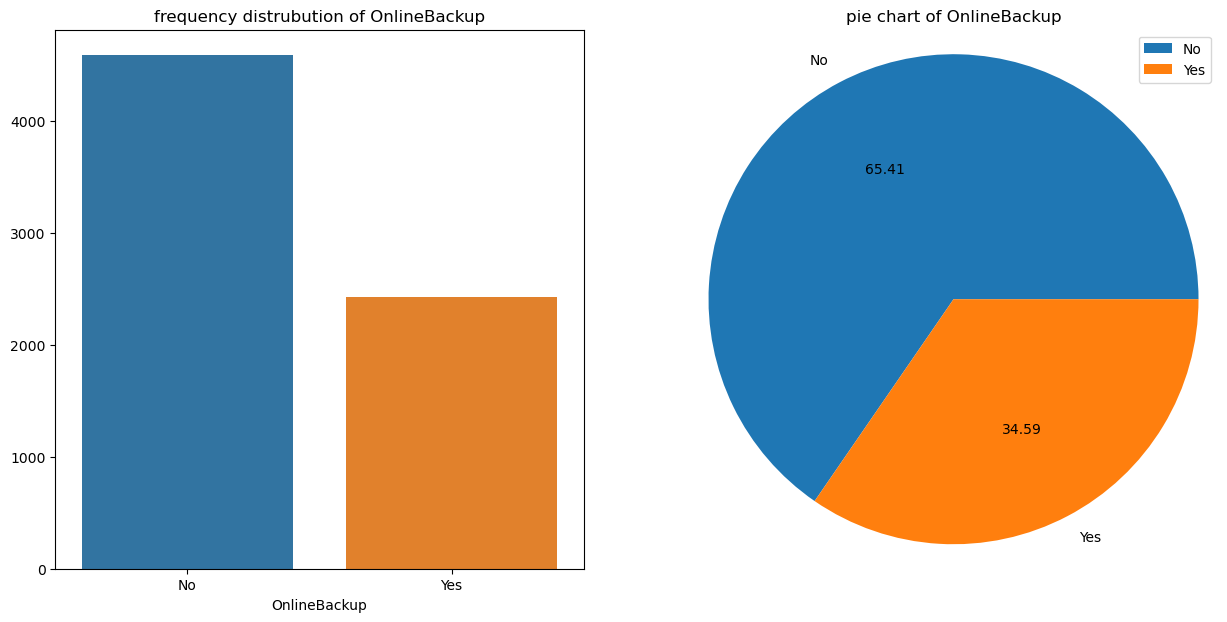

In [67]:
cat_plot('OnlineBackup')

# Conclussion
- we see that `35%` people avail online backup service and `65%` of the people can't avail the online service 

# Device Protection

In [68]:
data['DeviceProtection'].value_counts()

DeviceProtection
No     4592
Yes    2418
Name: count, dtype: int64

In [69]:
data['DeviceProtection'].value_counts(normalize=True)

DeviceProtection
No     0.655064
Yes    0.344936
Name: proportion, dtype: float64

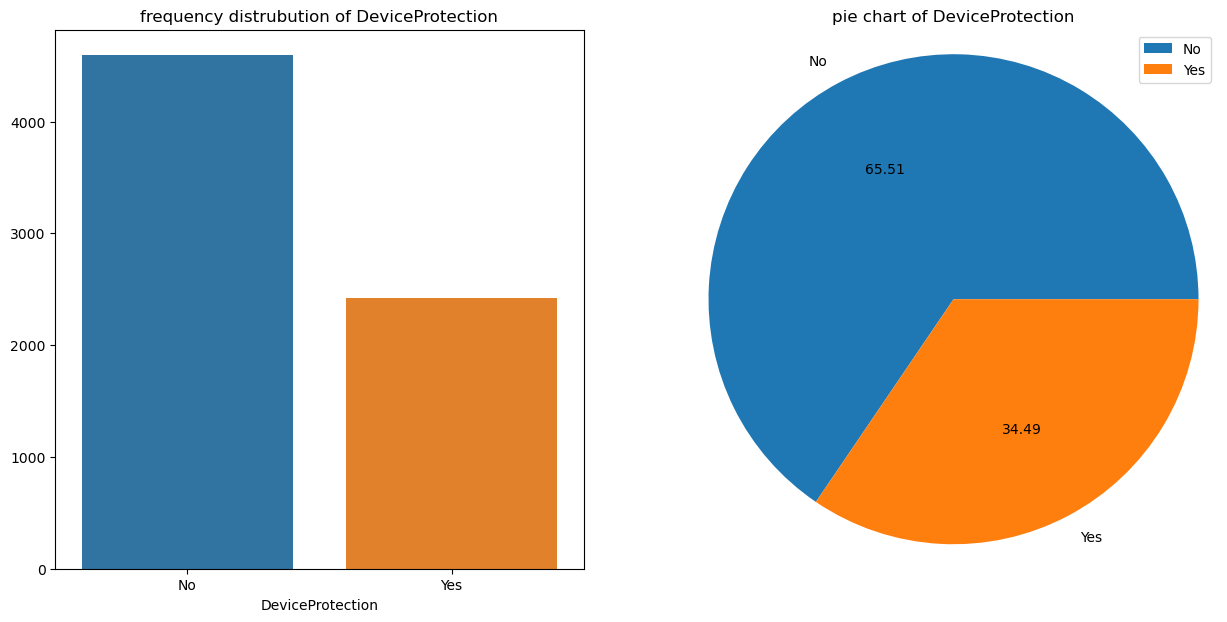

In [70]:
cat_plot("DeviceProtection")

# Conclussion
- we see that `65.51%` people avail Device Protection service and `34.49%` of the people avail the DeviceProtection service 

# TechSupport

In [71]:
data['TechSupport'].value_counts()

TechSupport
No     4970
Yes    2040
Name: count, dtype: int64

In [72]:
data['TechSupport'].value_counts(normalize=True)*100

TechSupport
No     70.898716
Yes    29.101284
Name: proportion, dtype: float64

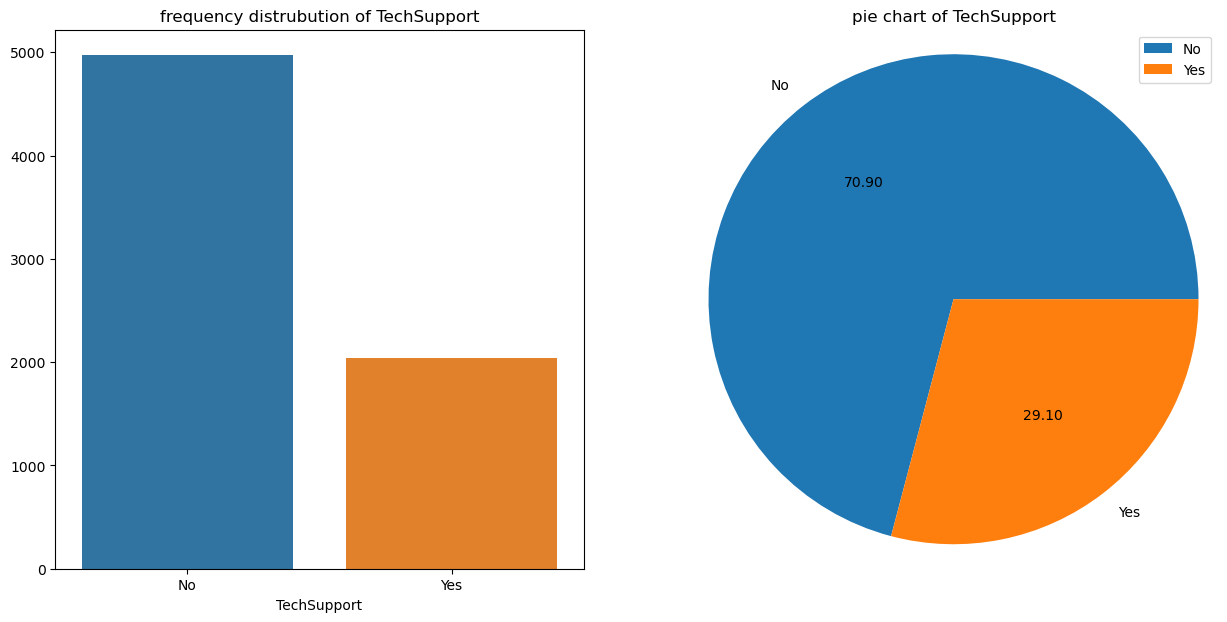

In [73]:
cat_plot('TechSupport')

# Conclussion
- Significant portion of the data donot have `TechSupport` and very less nbr of portion have `TechSupport`.

# StreamingTv

In [74]:
data['StreamingTV'].value_counts()

StreamingTV
No     4307
Yes    2703
Name: count, dtype: int64

In [75]:
data['StreamingTV'].value_counts(normalize=True)*100

StreamingTV
No     61.440799
Yes    38.559201
Name: proportion, dtype: float64

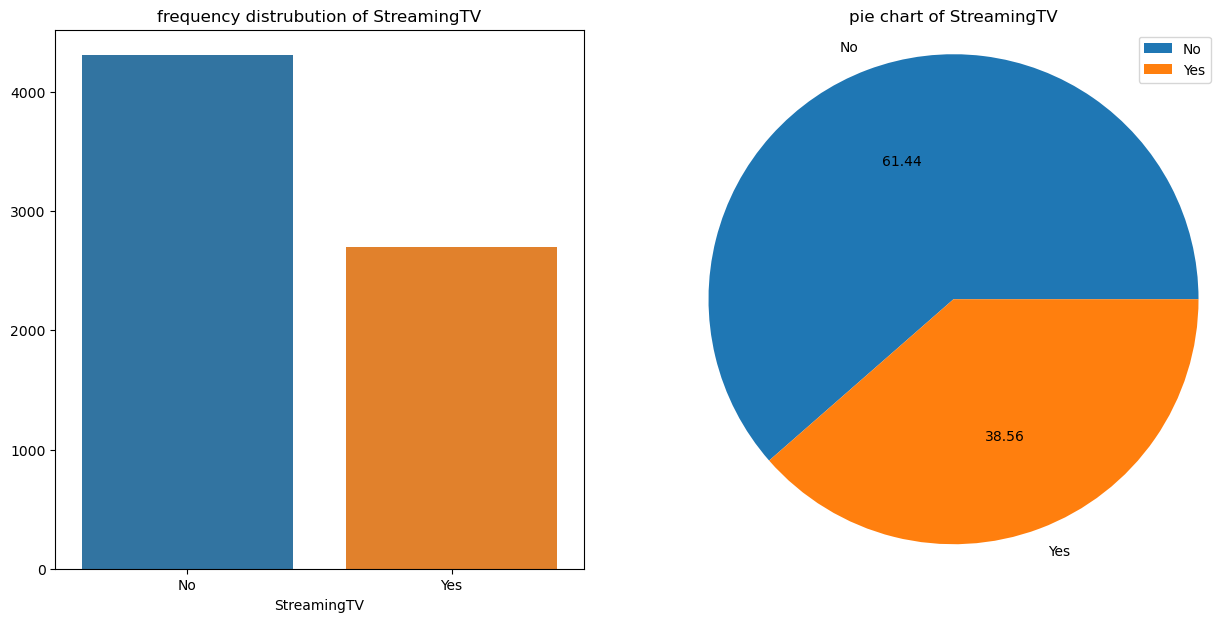

In [76]:
cat_plot("StreamingTV")

# Conclussion
- The majority of customers `(61.44%)` do not have access to streaming TV services, while a smaller proportion `(38.56%)` do.
- This indicates that there is a significant portion of the customer base who cannot utilize the streaming TV service offered by the company.

# Contract

In [77]:
data['Contract'].value_counts()

Contract
Month-to-month    3853
Two year          1685
One year          1472
Name: count, dtype: int64

In [78]:
data['Contract'].value_counts(normalize=True)*100

Contract
Month-to-month    54.964337
Two year          24.037090
One year          20.998573
Name: proportion, dtype: float64

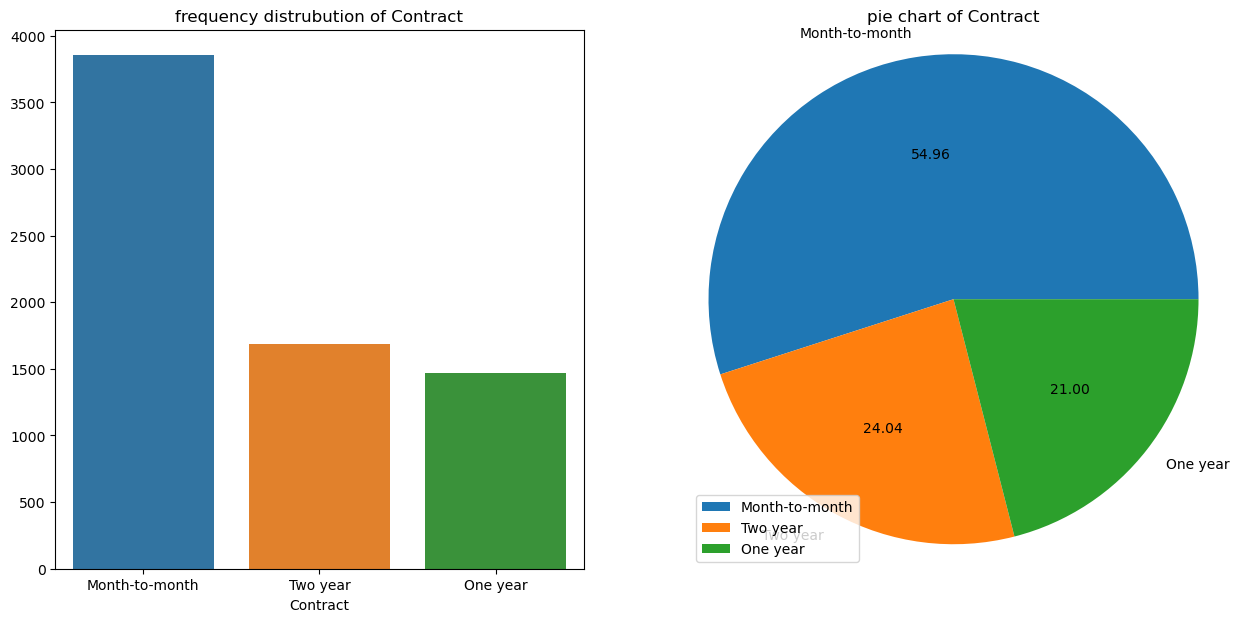

In [79]:
cat_plot('Contract')

# Conclussion
- Most of the mean `54.96%` customer can do `month-month` Contract.
- `21%` customer can do `One Year` Contract.
- `24%` Customer can do `Two Year` Contract.

# PaperlessBilling

In [80]:
data['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4158
No     2852
Name: count, dtype: int64

In [81]:
data['PaperlessBilling'].value_counts(normalize=True)*100

PaperlessBilling
Yes    59.315264
No     40.684736
Name: proportion, dtype: float64

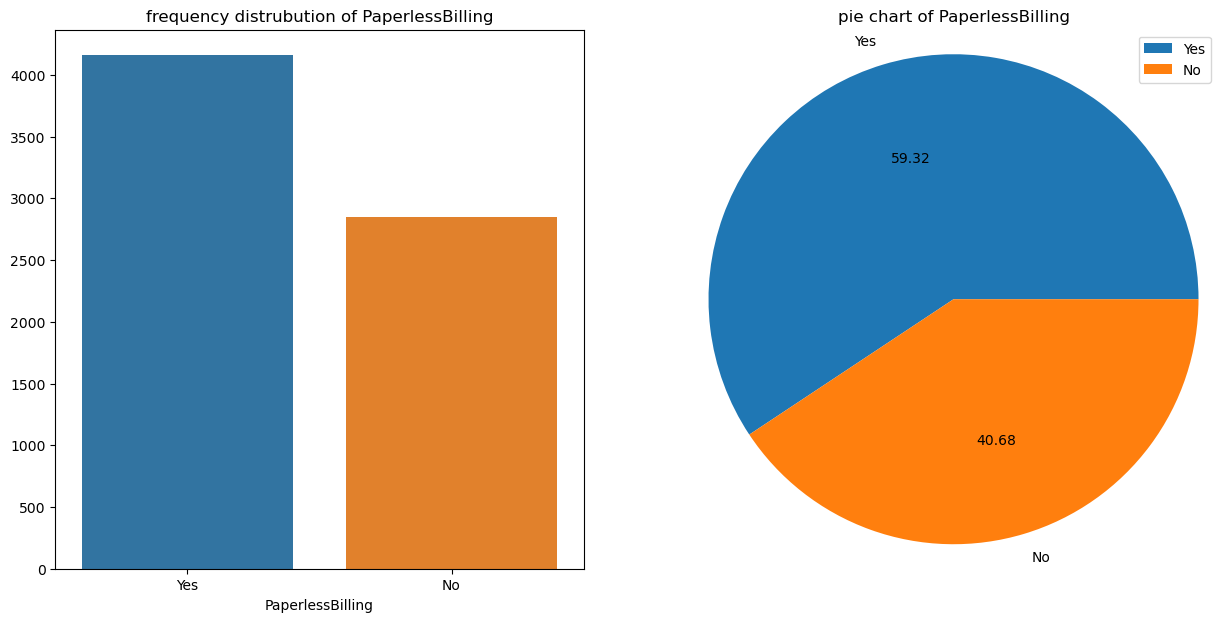

In [82]:
cat_plot('PaperlessBilling')

# PaymentMethod

In [83]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2359
Mailed check                 1588
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [84]:
data['PaymentMethod'].value_counts(normalize=True)*100

PaymentMethod
Electronic check             33.651926
Mailed check                 22.653352
Bank transfer (automatic)    21.997147
Credit card (automatic)      21.697575
Name: proportion, dtype: float64

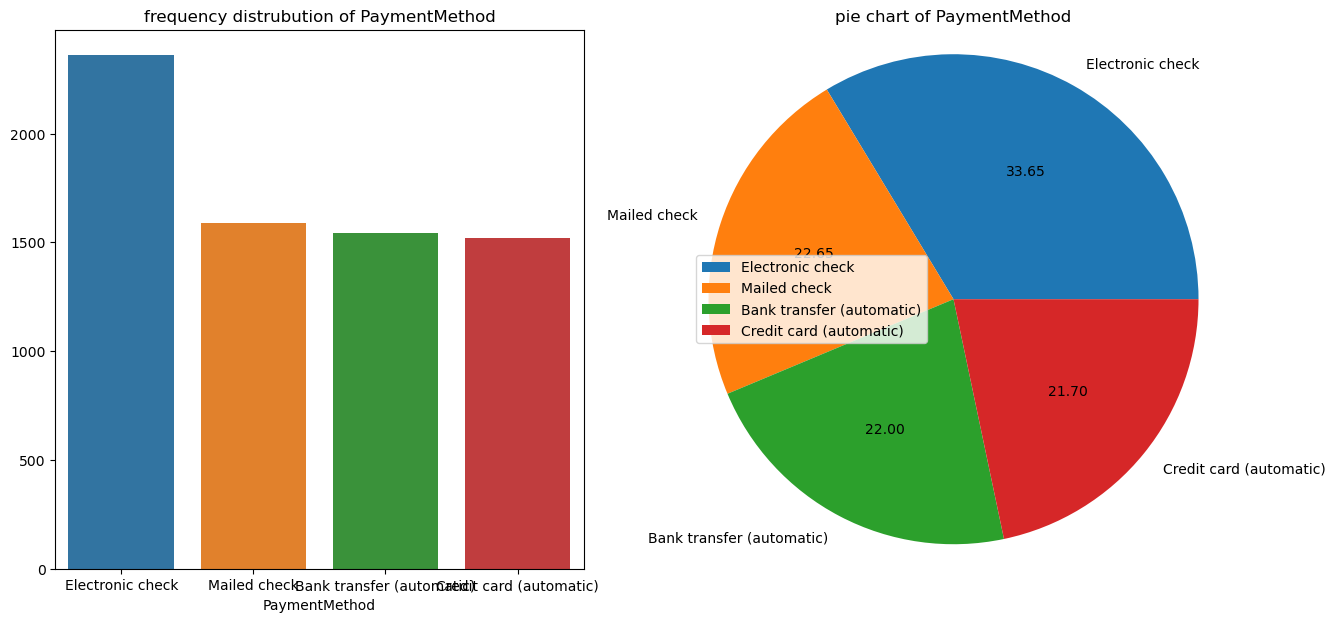

In [85]:
cat_plot("PaymentMethod")

# Bivariate Analysis
- **Num vs Cat Columns**

# Churn Vs tenure

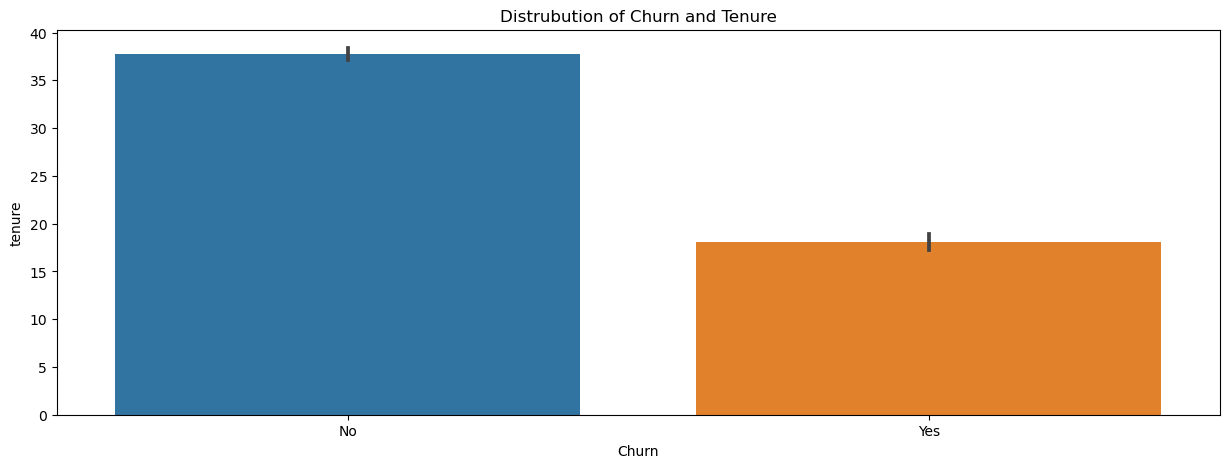

In [86]:
plt.figure(figsize=(15,5))
plt.title("Distrubution of Churn and Tenure")
sns.barplot(data=data,x='Churn',y='tenure')
plt.show()

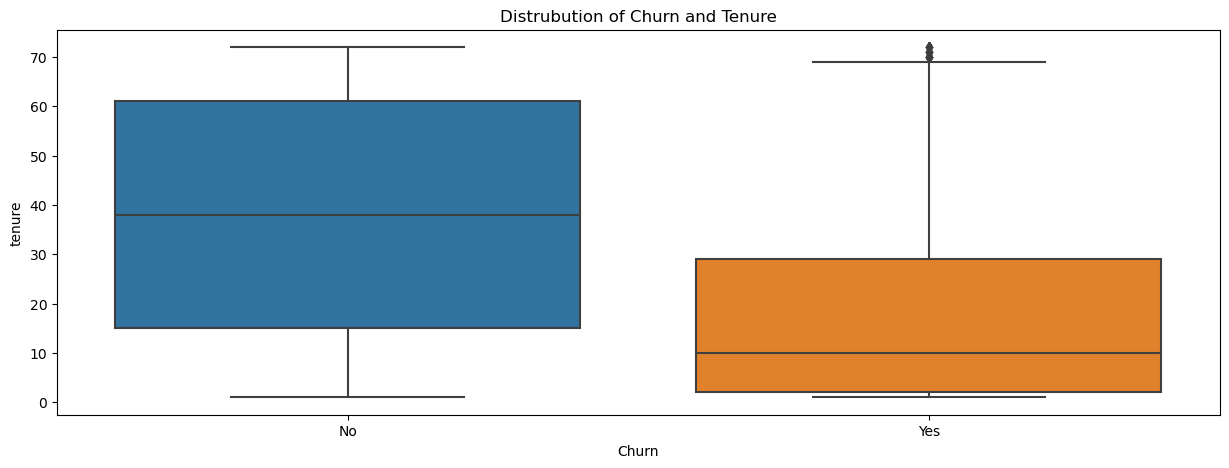

In [87]:
plt.figure(figsize=(15,5))
plt.title("Distrubution of Churn and Tenure")
sns.boxplot(data=data,x='Churn',y='tenure')
plt.show()

# Conclussion
- we can see that customer who can work very less month in the company they can leave.
- mean that if the tensure is high there should be less chance the customer can leave if he tensure is less there should be great chance customer can leave them.

# Churn vs MonthlyCharges

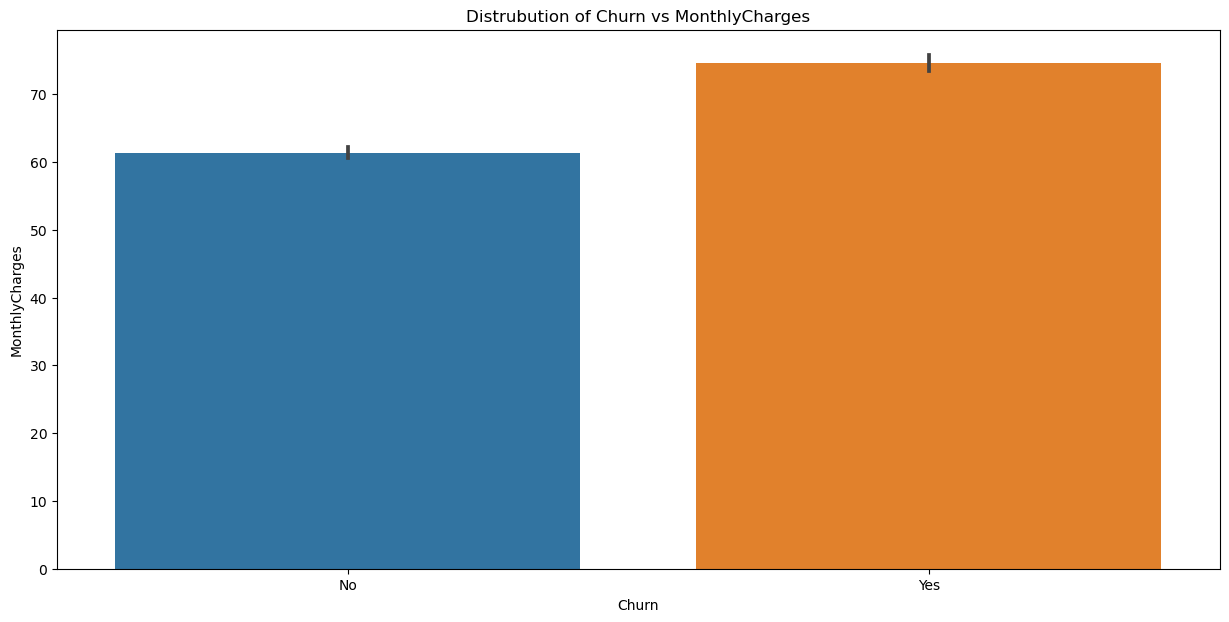

In [88]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Churn vs MonthlyCharges")
sns.barplot(x=data['Churn'],y=data['MonthlyCharges'])
plt.show()

# Conclussion
- We can see that if `monthlycharges` of the customer is high customer shlould leave.
- if `monthlycharges` of the customer is low customer not shlould leave.

# Total_Charges Vs Churn

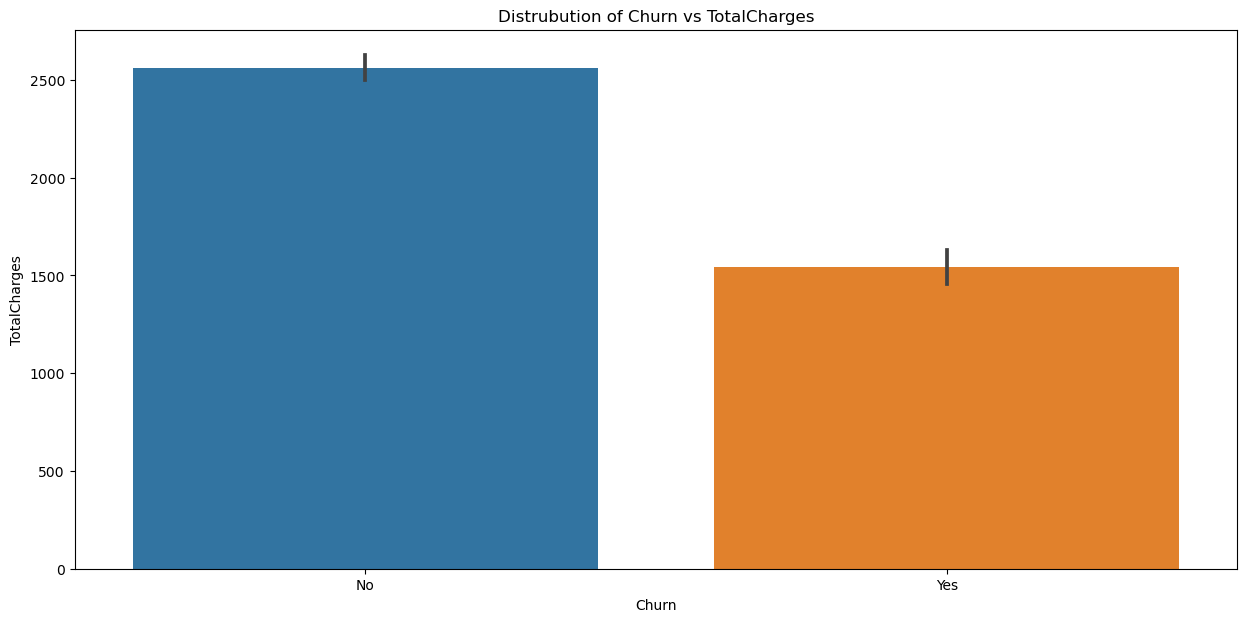

In [89]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Churn vs TotalCharges")
sns.barplot(x=data['Churn'],y=data['TotalCharges'])
plt.show()

# Conclussion
- We can see that if `TotalCharges` is high customer can't leave it show that company should be decrease the `Monthly Charges`

In [90]:
data.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5219,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.60,20.6,No
6277,Male,0,No,No,2,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.35,33.2,Yes


# catagorical-target col

# Saperate the cat columns

In [91]:
num_feature=data.select_dtypes("number").columns
num_feature

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

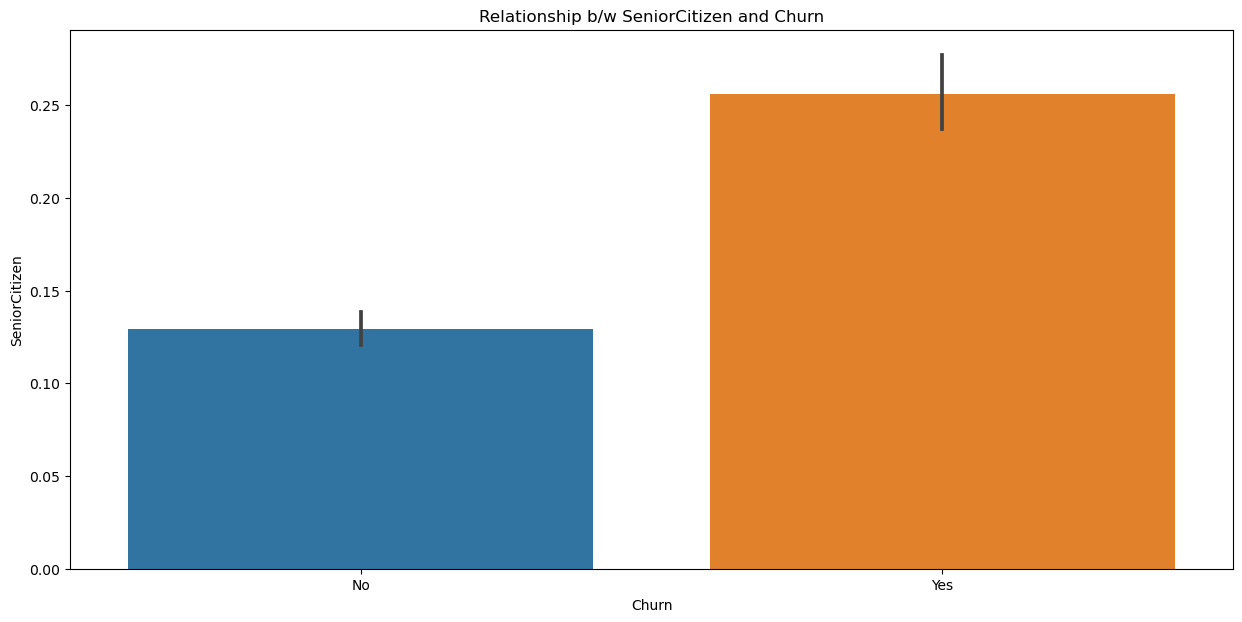

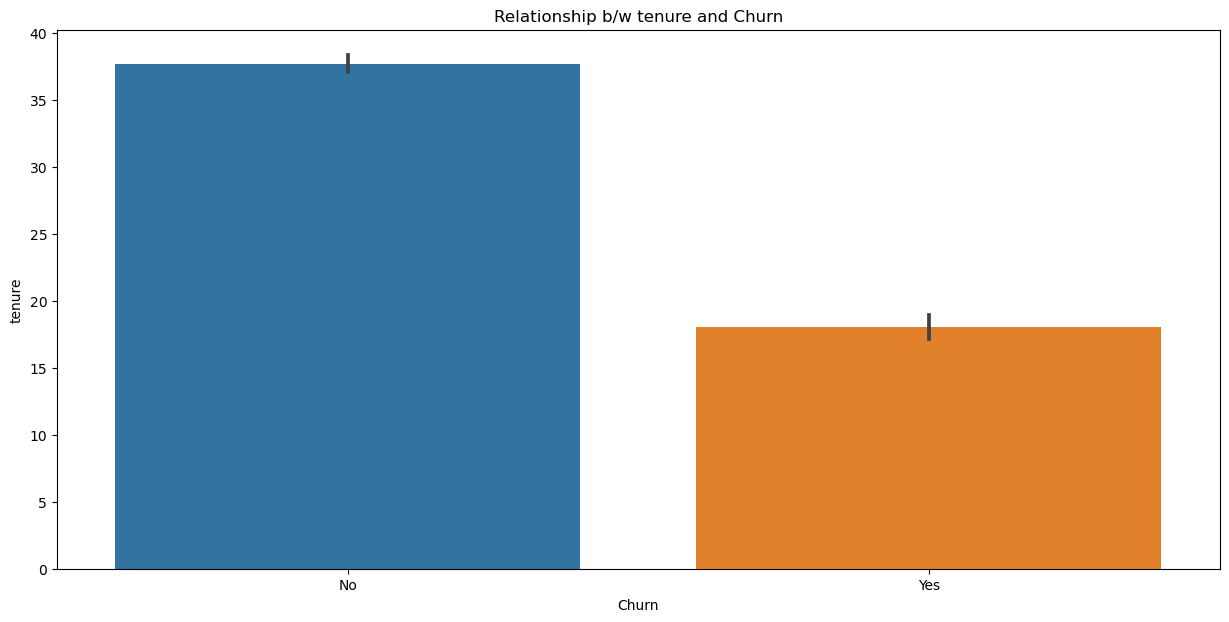

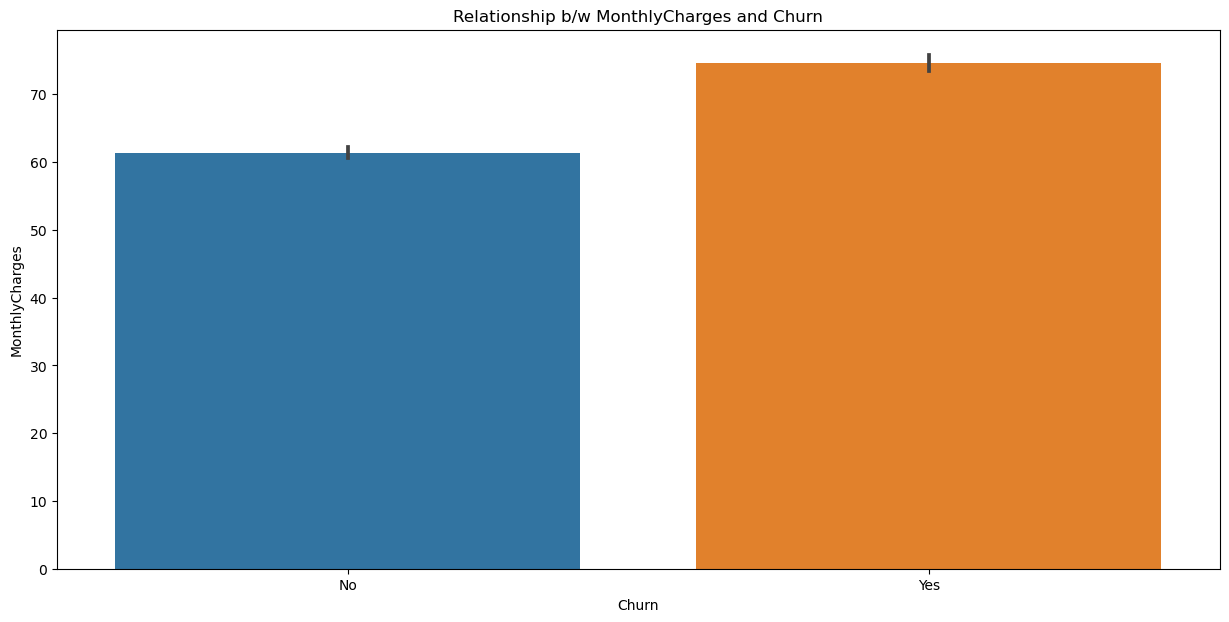

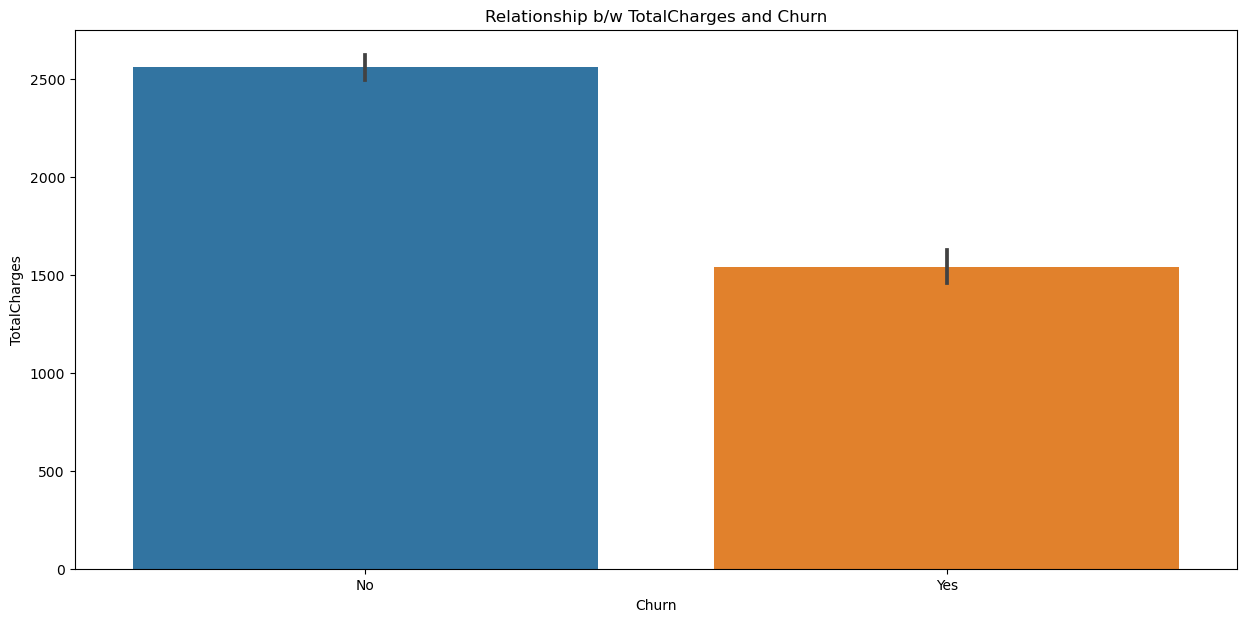

In [92]:
for feature in num_feature:
    plt.figure(figsize=(15,7))
    plt.title(f"Relationship b/w {feature} and Churn")
    sns.barplot(data=data,x='Churn',y=feature)
    plt.show()

# Conclussion
- **For seniorcitezen vs Churn**
    - Those customer who have seniorcitezen who can't leave them.
    - Those Customer who have not senior Citezen who can leave them
- **For Tenure vs Churn**
    - Those customer who work year is high who can't leave and those whose work year is less who can leave
- **For MonthltCharges vs Churn**
    - If the monthly charges is high customer should leave
    - If Monthly Charges is low who can't leave
- **For TotalCharges vs Churn**
    - If the Total charges is high customer should not  leave.
    - If Monthly Charges is low customer should leave.

# Feature Engnering
- Feature Engnering is a tecnique which we can select those feature who can fullfill the condition.
- **Chie-Square Test**
    - In chie-square test we can check the relatioship of each categorical col to target col.
    - If the correlation is less then 0.05 we can select those feature

In [93]:
from scipy.stats import chi2_contingency

# Chie-Square Test

In [94]:
cat_feature=data.select_dtypes("object").columns
num_feature=data.select_dtypes("number").columns

In [95]:
select_feature=[]
drop_feature=[]
for feature in cat_feature:
    if feature!="Churn":
        # Make a Contensity table
        cross_table=pd.crosstab(data[feature],data["Churn"])
        
        chi2, p_value, _, _=chi2_contingency(cross_table)
        
        if p_value<0.05:
            print(f"{feature} _p_values is {p_value}")
            select_feature.append(feature)
        else:
            drop_feature.append(feature)

Partner _p_values is 2.0248561714739414e-35
Dependents _p_values is 6.48802519091279e-42
MultipleLines _p_values is 0.0005019781425399228
InternetService _p_values is 6.611624411865297e-159
OnlineSecurity _p_values is 4.433936702110834e-46
OnlineBackup _p_values is 1.3287905168142364e-11
DeviceProtection _p_values is 6.23810221625441e-08
TechSupport _p_values is 1.0211659988009781e-42
StreamingTV _p_values is 5.985662157966025e-08
StreamingMovies _p_values is 1.7958664286018001e-07
Contract _p_values is 7.98506189226596e-256
PaperlessBilling _p_values is 4.3362822204401427e-57
PaymentMethod _p_values is 1.1761169603808132e-138


In [96]:
print(f"Total Cat Feature is {cat_feature}")
print()
print(f"Select lsit Feature is: {len(select_feature)}")
print()
print(f"Drop lsit Feature is: {len(drop_feature)}")

Total Cat Feature is Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Select lsit Feature is: 13

Drop lsit Feature is: 2


# Conclussion
- we can see that out of 15 feature 2 feature can't fullfill the condition so we can add in drop list.

# T-Test 
- T-Test is also a hypothesis test that are used to check the relationship of numerical col to the target col.
- It is usefull if the categories is equal to 2.

In [97]:
from scipy.stats import ttest_ind

In [98]:
for num_col in num_feature:
    # First filter those Yes data
    churn=data[data['Churn']=="Yes"][num_col]
    
    # First filter those No data
    not_churn=data[data['Churn']=="No"][num_col]
    
    # Apply T-tes
    t_stat,p_value=ttest_ind(churn,not_churn,nan_policy='omit')
    print(f"{num_col} p_value ==> {p_value}")
    
    if p_value<0.05:
        select_feature.append(num_col)
    else:
        drop_feature.append(num_col)

SeniorCitizen p_value ==> 3.7177162239586706e-37
tenure p_value ==> 3.0931274273843194e-205
MonthlyCharges p_value ==> 2.021823487079859e-60
TotalCharges p_value ==> 3.914665283658474e-63


In [99]:
len(select_feature)

17